<div style="background-color:#000047; padding: 30px; border-radius: 10px; color: white; text-align: center;">
    <img src='Figures/alinco.png' style="height: 100px; margin-bottom: 10px;"/>
    <h1>Aplicación Redes Neuronales Librería (MNIST)</h1>
</div>


Vamos a crear una red neuronal para tratar ahora con un conjunto mucho más grande, el *dataset* MNIST. Verás que, a medida que tratamos con conjuntos mayores, el tiempo de procesamiento se incrementa y la necesidad de contar con una GPU crece al mismo ritmo. 


### Conjunto MNIST

El [conjunto MNIST](https://en.wikipedia.org/wiki/MNIST_database) está formado por 70.000 imágenes de dígitos manuscritos del 0 al 9 con un tamaño de 28x28 en escala de grises. A su vez, el conjunto se divide en 60.000 imágenes para entrenamiento y 10.000 para test.

<img src="Figures/mnist.jpg" width="80%">

Vamos a utilizar este *dataset* para entrenar una red y ver qué precisión obtenemos al clasificar el conjunto de test. Piensa bien lo que pretendemos lograr: **hacer una red que será capaz de “ver”**, aunque, por ahora, solo sean imágenes de dos dimensiones.


El conjunto MNIST es muy popular y se utiliza mucho para aprender y probar redes, así que Keras ya lo incluye como parte de la librería.

In [1]:
#importar Keras y mnist data

import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# veamos la imagen

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()



In [4]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train[0].shape

(28, 28)

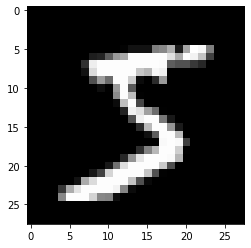

In [7]:
#Visualizar la primera imagen
image = np.array(X_train[0], dtype='uint8')
import matplotlib.pyplot as plt 
plt.imshow(image, cmap='gray')
plt.show()

También es necesario saber en qué rango de valores se mueven nuestras muestras.

In [8]:
#max, min values
max(X_train[0].flatten()), min(X_train[0].flatten())

(255, 0)

Vemos que cada pixel es un byte con un rango de valores que va desde el 0 hasta el 255 en formato entero. Esta escala no es muy adecuada para la red. Podemos facilitar mucho el trabajo de entrenamiento si transformamos esta escala en otra centrada en el 0 y con un rango de valores entre -0.5 y 0.5. Y, por supuesto, en formato real.

In [9]:
# particionar la data en test y train
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# escalar los rangos
X_train -= 0.5
X_test -= 0.5

In [10]:
max(X_train[0].flatten()), min(X_train[0].flatten())

(0.5, -0.5)

In [12]:
28*28

784

In [13]:
#max, min values
X_train = X_train.reshape((X_train.shape[0], 28*28))
X_test = X_test.reshape((X_test.shape[0], 28*28))

In [14]:
X_train.shape

(60000, 784)

In [ ]:
#max, min values


Ahora preparamos las etiquetas transformándolas a formato *one_hot*. Keras tiene funciones para ello.

In [16]:
y_train.shape

(60000,)

In [18]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
# one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [20]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Preparación del modelo

Tenemos que clasificar imágenes en diez categorías distintas, luego la capa final tendrá diez salidas. En cuanto a la capa de entrada, tenemos una matriz de $28 \times 28$. Lo que vamos a hacer es transformarla en un vector de $784$ componentes (
$28\times28=784$). Simplemente tomaremos cada fila de la matriz y las iremos colocando secuencialmente.

Para la capa o capas ocultas vamos a probar primero con una capa oculta con 20 neuronas. Recuerda que estos son los **hiperparámetros** de los que ya hemos hablado. No hay forma de saber *a priori* cuál es el número óptimo de capas ni de neuronas por capa oculta.

Como funciones de activación utilizaremos sigmoides y, en la capa final, softmax.

En lugar de definir la red de nuevo con el modelo secuencial de Keras, vamos a hacerlo con la [API funcional](https://keras.io/getting-started/functional-api-guide/). Esta API nos sirve para poder definir modelos más complejos que los simplemente creados a partir de acumular capas apiladas. Hay redes que tienen arquitecturas donde hay capas compartidas, las salidas de una capa pueden ir a capas separadas varias capas, etc. Hay una gran variedad. 

Por supuesto, la red que vamos a hacer ahora la podríamos hacer perfectamente con el modelo secuencial (y hasta nos sería más fácil), pero vamos a aprender a utilizar esta API.

In [21]:
# configurar la red
modelo = Sequential()
modelo.add(Dense(input_dim=28*28, units=20, activation='sigmoid'))
modelo.add(Dense(units=10, activation='softmax'))

### Entrenamiento

In [22]:
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Si te has fijado, la API funcional usa la función <code>Dense(units=20, activation='sigmoid')(inputs)</code> para crear una capa en lugar del método <code>model.add(Dense(units=20, activation='sigmoid', input_dim=784))</code> del modelo. Esto nos da libertad para asignar la salida de una capa a la entrada de la capa que queramos, no obligatoriamente a la siguiente.

Durante el entrenamiento vamos a ir viendo también cómo va evolucionando el *accuracy* del conjunto de test. Cuando usamos el conjunto de test de esta manera se suele llamar **conjunto de validación**.

In [23]:
#historial
historial = modelo.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1875/1875 [==============================] - 2s 899us/step - loss: 0.7045 - accuracy: 0.8400
Epoch 2/100
1875/1875 [==============================] - 2s 952us/step - loss: 0.3238 - accuracy: 0.9111
Epoch 3/100
1875/1875 [==============================] - 2s 864us/step - loss: 0.2686 - accuracy: 0.9238
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2384 - accuracy: 0.9322
Epoch 5/100
1875/1875 [==============================] - 2s 983us/step - loss: 0.2179 - accuracy: 0.9374
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2037 - accuracy: 0.9407
Epoch 7/100
1875/1875 [==============================] - 2s 850us/step - loss: 0.1914 - accuracy: 0.9436
Epoch 8/100
1875/1875 [==============================] - 2s 821us/step - loss: 0.1823 - accuracy: 0.9471
Epoch 9/100
1875/1875 [==============================] - 1s 790us/step - loss: 0.1740 - accuracy: 0.9494
Epoch 10/100
1875/1875 [==============================] - 2

In [24]:
modelo.evaluate(X_test, y_test)

313/313 [==============================] - 0s 774us/step - loss: 0.1852 - accuracy: 0.9540


[0.18523463606834412, 0.9539999961853027]

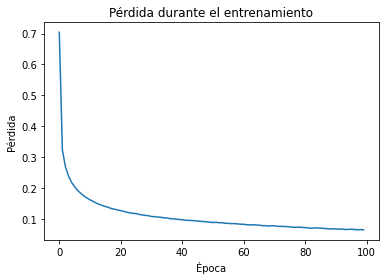

In [25]:
# visualización de la clasificación

import matplotlib.pyplot as plt
plt.plot(historial.history['loss'])
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

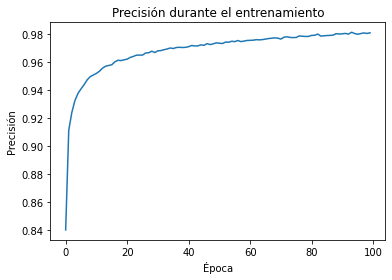

In [26]:
plt.plot(historial.history['accuracy'])
plt.title('Precisión durante el entrenamiento') 
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.show()

### Conjuntos de entrenamiento, validación y test

Si nos enfrentáramos a un problema de clasificación con responsabilildad deberíamos ser capaces de asegurar que el rendimiento que decimos que tiene nuestra red es el que realmente tiene (y no necesariamente una red, sino a cualquier modelo de clasificación que utilicemos. No solo de redes vive el experto en *machine learning*).

Para ello, hasta ahora hemos hecho uso del conjunto de test. Pero, cuando entrenamos una red hacemos muchas pruebas, muchos cambios en su configuración (los hiperparámetros) buscando una de ellas que nos dé los mejores resultados. Llegará un momento en el que hemos hecho tantas modificaciones en la red que nuestro conjunto de test logrará un buen *accuracy*. Sin embargo, ¿cómo podemos estar seguros de que la red funcionaría bien para un nuevo conjunto de test? Es decir, quizá hayamos involuntariamente optimizado la red para que funcione bien sobre el conjunto de test.

La forma de asegurar que hemos entrenado una red que **generaliza** correctamente es disponer de tres conjuntos: **entrenamiento**, **validación** y **test**. Con el de entrenamiento, entrenamos, y utilizaremos el conjunto de validación para comprobar el nivel de *accuracy* logrado en ese modelo. Al final de todas las pruebas que hayamos hecho, dispondremos de nuestro modelo final. En ese momento tomaremos nuestro conjunto de test (que previamente habíamos guardado bajo llave para evitar la tentación de utilizarlo antes) y lo pasaremos por la red. El *accuracy* que nos devuelva este conjunto de test será nuestro resultado final.

Nosotros en las clases no nos vamos a preocupar mucho de esto, y utilizaremos el conjunto de test también como conjunto de validación. 

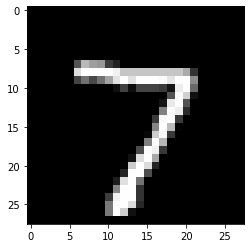

In [28]:
image = np.array((X_test[0] + 0.5)*255, dtype='uint8').reshape(28,28)
import matplotlib.pyplot as plt
plt.imshow(image, cmap='gray')
plt.show()

In [29]:
x_prueba = (X_test[0]).reshape(1, 28*28)

In [30]:
x_prueba 

array([[-0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5

In [32]:
salida_red = modelo.predict(x_prueba)
salida_red

array([[9.4110952e-10, 1.8961385e-10, 1.9867271e-06, 1.1985440e-05,
        1.0093160e-10, 5.9731150e-07, 1.8567079e-16, 9.9998534e-01,
        8.7872598e-10, 1.1713331e-08]], dtype=float32)

In [33]:
salida_red.argmax()

7